In [ ]:
#imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

print(tf.__version__)

2021-07-27 20:31:35.383574: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-07-27 20:31:35.383621: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2.4.1


In [ ]:
data = pd.read_csv('full_dataset.csv', index_col = False)

train_dataset = data.sample(frac=0.8, random_state=25)
test_dataset = data.drop(train_dataset.index)

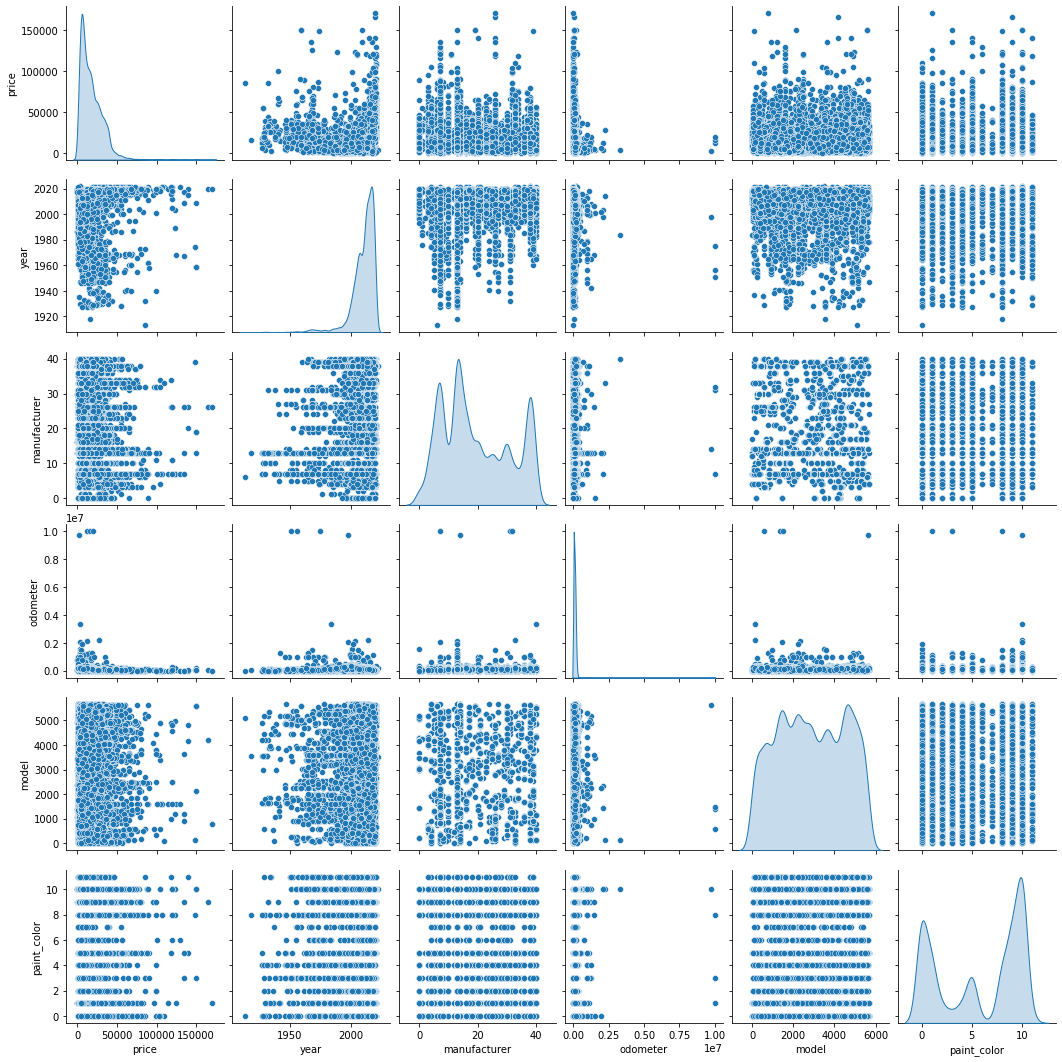

In [ ]:
sns.pairplot(train_dataset[['price', 'year', 'manufacturer', 'odometer', 'model', 'paint_color']], diag_kind='kde')

In [ ]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,23647.0,14832.692054,8532.388040,0.0,7438.5,14893.0,22222.5,29558.0
price,23647.0,17843.753669,13714.185857,537.0,7000.0,14900.0,25590.0,169888.0
year,23647.0,2009.880323,10.407248,1913.0,2006.0,2013.0,2017.0,2022.0
manufacturer,23647.0,19.457648,11.544209,0.0,10.0,16.0,30.0,40.0
model,23647.0,2873.585360,1617.224877,0.0,1517.0,2851.0,4376.5,5667.0
condition,23647.0,1.352222,1.096952,0.0,0.0,2.0,2.0,5.0
odometer,23647.0,99303.370829,154621.764361,0.0,36768.0,87500.0,141675.5,10000000.0
title_status,23647.0,0.168605,0.842166,0.0,0.0,0.0,0.0,5.0
transmission,23647.0,0.497864,0.821342,0.0,0.0,0.0,1.0,2.0
drive,23647.0,0.940838,0.773740,0.0,0.0,1.0,2.0,2.0


In [ ]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('price')
test_labels = test_features.pop('price')

In [ ]:
test_labels.describe().transpose()[['mean', 'std']]

mean    2.058781e+05
std     1.445054e+07
Name: price, dtype: float64

In [ ]:
normalizer = preprocessing.Normalization(axis=-1)

In [ ]:
normalizer.adapt(np.array(train_features))
print(normalizer.mean.numpy())

[1.4832692e+04 2.0098804e+03 1.9457647e+01 2.8735854e+03 1.3522223e+00
 9.9303367e+04 1.6860490e-01 4.9786443e-01 9.4083816e-01 5.7717257e+00
 4.3910007e+00]
2021-07-27 20:31:47.978681: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-07-27 20:31:47.981610: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-07-27 20:31:47.981629: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2021-07-27 20:31:47.981653: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (p-b59c8148-3fc2-4621-a8e2-479cc45d8e98): /proc/driver/nvidia/version does not exist
2021-07-27 20:31:47.981881: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Dee

In [ ]:
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

First example: [[17334.  2018.    26.  2798.     2. 11931.     0.     2.     1.    10.
      4.]]

Normalized: [[ 0.29  0.78  0.57 -0.05  0.59 -0.57 -0.2   1.83  0.08  1.04 -0.19]]


In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10000])
  plt.xlabel('Epoch')
  plt.ylabel('Error [price]')
  plt.legend()
  plt.grid(True)
def plot_odometer(x, y):
  plt.scatter(train_features['odometer'], train_labels, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('odometer')
  plt.ylabel('price')
  plt.legend()

In [ ]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [ ]:
odometer = np.array(train_features['odometer'])

odometer_normalizer = preprocessing.Normalization(input_shape=[1,], axis=None)
odometer_normalizer.adapt(odometer)

odometer_model = tf.keras.Sequential([
    odometer_normalizer,
    layers.Dense(units=1)
])

odometer_model.summary()

odometer_model.predict(odometer[:10])

2021-07-27 20:31:48.175690: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_1 (Normalizati (None, 1)                 3         
_________________________________________________________________
dense (Dense)                (None, 1)                 2         
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________
2021-07-27 20:31:48.209589: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2499995000 Hz


array([[ 0.74514365],
       [ 0.49723256],
       [-0.5176432 ],
       [ 0.6059778 ],
       [-0.79903674],
       [ 0.45642433],
       [ 0.6507432 ],
       [ 0.48832044],
       [-0.21062197],
       [-0.36327976]], dtype=float32)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_1 (Normalizati (None, 1)                 3         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                128       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 4,356
Trainable params: 4,353
Non-trainable params: 3
_________________________________________________________________
Epoch 1/80
592/592 [==============================] - 2s 2ms/step - loss: 17474.6958 - val_loss: 14757.6846
Epoch 2/80
592/592 [==============================] - 1s 1ms/step - loss: 12310.1949 - val_loss: 8191.9517
Epoch 3/80
592/592 [===============

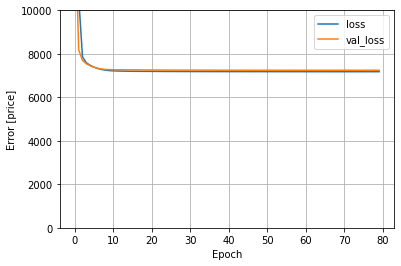

In [ ]:
dnn_odometer_model = build_and_compile_model(odometer_normalizer)
dnn_odometer_model.summary()
history = dnn_odometer_model.fit(
    train_features['odometer'], train_labels,
    validation_split=0.2,
    verbose=1, epochs=80)
plot_loss(history)



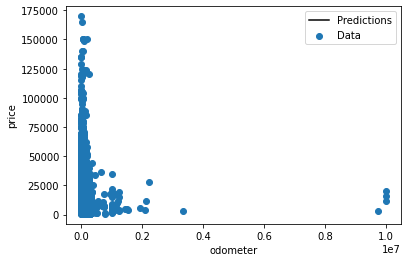

In [ ]:
x = tf.linspace(0.0, 250, 251)
y = dnn_odometer_model.predict(x)
plot_odometer(x, y)

In [ ]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization (None, 11)                23        
_________________________________________________________________
dense_4 (Dense)              (None, 64)                768       
_________________________________________________________________
dense_5 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 65        
Total params: 5,016
Trainable params: 4,993
Non-trainable params: 23
_________________________________________________________________


In [ ]:
history = dnn_model.fit(
    train_features, train_labels,
    validation_split=0.2,
    verbose=1, epochs=100)

Epoch 1/100
592/592 [==============================] - 1s 1ms/step - loss: 17364.6626 - val_loss: 13109.5488
Epoch 2/100
592/592 [==============================] - 1s 1ms/step - loss: 10865.5068 - val_loss: 7171.7778
Epoch 3/100
592/592 [==============================] - 1s 1ms/step - loss: 7148.4724 - val_loss: 6721.4922
Epoch 4/100
592/592 [==============================] - 1s 1ms/step - loss: 6697.7090 - val_loss: 6498.0615
Epoch 5/100
592/592 [==============================] - 1s 1ms/step - loss: 6655.7729 - val_loss: 6334.9434
Epoch 6/100
592/592 [==============================] - 1s 1ms/step - loss: 6209.9051 - val_loss: 6183.2046
Epoch 7/100
592/592 [==============================] - 1s 1ms/step - loss: 6123.7763 - val_loss: 6038.2666
Epoch 8/100
592/592 [==============================] - 1s 1ms/step - loss: 6050.4373 - val_loss: 5899.3740
Epoch 9/100
592/592 [==============================] - 1s 1ms/step - loss: 5990.8144 - val_loss: 5780.7915
Epoch 10/100
592/592 [============

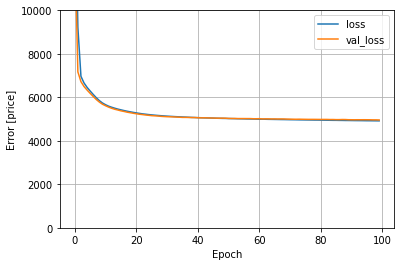

In [ ]:
plot_loss(history)

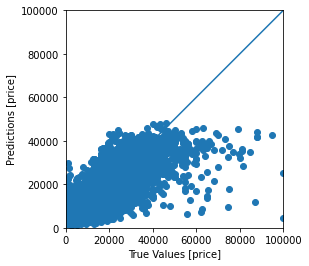

In [ ]:
test_predictions = dnn_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [price]')
plt.ylabel('Predictions [price]')
lims = [0, 100000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

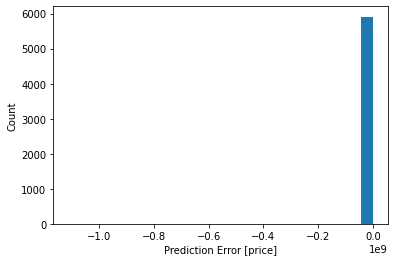

In [ ]:
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [price]')
_ = plt.ylabel('Count')

In [ ]:
#year, manufac, model, condition, odometer, title, transmission, drive, paint, state
d = np.array([[2010,13,2116,0,97972,0,0,1,10,1]])

new_model = tf.keras.models.load_model('dnn_model')

test_predictions = new_model.predict(d)
test_predictions

array([[9212.565]], dtype=float32)

In [ ]:
data = pd.read_csv('coded_cars.csv')
manufacturerDict = {} #direct manufacturer to model dictionary
modelCodeDict = {} #model to model code dictionary
manufacturerCodeDict = {} #make to make code dictionary
transmissionCodeDict = {
    'Automatic': 0,
    'Manual': 1   
}
conditionCodeDict = {
    'Excellent': 0,
    'Fair': 1,
    'Good': 2,
    'Like New': 3,
    'New': 4
}
driveCodeDict = {
    'AWD': 0,
    'FWD': 1,
    'RWD': 2
}
titleStatusCodeDict = {
    'Clean': 0,
    'Lien': 1,
    'Missing': 2,
    'Rebuilt': 4,
    'Salvage': 5
}
stateCodeDict = {}
paintCodeDict = {}

i = 0
for row in data.itertuples():
    if row.paint_color not in paintCodeDict:
        paintCodeDict[row.paint_color] = row.paint_color_Codes
        
    if row.manufacturer not in manufacturerDict:
       manufacturerDict[row.manufacturer] = [row.model]
       modelCodeDict[row.model] = row.model_Codes
       manufacturerCodeDict[row.manufacturer] = row.manufacturer_Codes
    else:
        if row.model not in manufacturerDict[row.manufacturer]:
            manufacturerDict[row.manufacturer].append(row.model) 
            modelCodeDict[row.model] = row.model_Codes


print(paintCodeDict)

{'black': 0, 'silver': 9, 'grey': 5, 'red': 8, 'blue': 1, 'white': 10, 'brown': 2, 'yellow': 11, 'green': 4, 'custom': 3, 'orange': 6, 'purple': 7}


In [ ]:
#year, manufac, model, condition, odometer, title, transmission, drive, paint, state
year = int(input("What year is your vehicle?"))
manufac = manufacturerCodeDict[input("What make is your car?")]
model = modelCodeDict[input("What model is your car?")]
transmission = transmissionCodeDict[input("What transmission is your car?")]
condition = conditionCodeDict[input("What condition is your car in?")]
odometer = int(input("What mileage is your car?(no commas)"))
paint = paintCodeDict[input('What color is your car?')]
drive = driveCodeDict[input("Is your car FWD, RWD, or AWD?")]
title = titleStatusCodeDict[input("What is the status of your title?")]
state = 1

d = np.array([[year, manufac, model, condition, odometer, title, transmission, drive, paint, state]])

new_model = tf.keras.models.load_model('dnn_model')

test_predictions = new_model.predict(d)
print("Your price is: $" + str(test_predictions[0][0]))

Your price is: $9474.957


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b59c8148-3fc2-4621-a8e2-479cc45d8e98' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>